# isaura beersheba track comparison

#### low pressure data

In [2]:
import sys,os,os.path
sys.path.append("../../")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun


from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType


from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [29]:
# choose an event :) but make sure it exists! do it via index
evt_number = 5080010

In [30]:
### COLLECT BEERSHEBA PLOTS
LP_file = '../LPR_rerun/PORT_1a/prod/beersheba/beersheba_255_208Tl.h5'
#LP_file = f'LPR/208Tl/PORT_1a/prod/beersheba/beersheba_92_208Tl.h5'
HP_file = f'HPR/208Tl/PORT_1a/prod/beersheba/beersheba_92_208Tl.h5'

# load in events from deco
hdst = dstio.load_dst(LP_file, 'DECO', 'Events')
print(hdst.event.nunique())
print(hdst.event.unique()[:10])

375
[5080000 5080002 5080004 5080006 5080008 5080010 5080012 5080014 5080016
 5080018]


In [31]:
# add isaura equivalent
#LP_file_isaura = f'LPR/208Tl/PORT_1a/prod/isaura/isaura/isaura_255_208Tl.h5'
LP_file_isaura = '../LPR_rerun/PORT_1a/prod/isaura/isaura_255_208Tl.h5'

hdst_isaura = dstio.load_dst(LP_file_isaura, 'Tracking', 'Tracks')

In [32]:
display(hdst_isaura)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,5080000,0,1.039447,106.957101,130,10660,4,368.675,160.675,334.439758,...,346.618662,395.709598,257.212595,386.899102,0.549273,0.021990,0.000000,9.857143,9.928571,4.809897
1,5080000,1,0.013352,4.809897,2,47,4,388.675,270.675,440.460083,...,441.936821,389.120948,279.638220,446.759552,0.013352,0.013352,0.013352,9.857143,9.928571,4.809897
2,5080000,2,0.010388,0.000000,1,65,4,378.675,254.675,408.962036,...,409.787137,381.749030,256.750470,409.787137,0.010388,0.010388,0.010388,9.857143,9.928571,4.809897
3,5080000,3,0.001319,0.000000,1,21,4,378.675,254.675,424.692047,...,424.692047,381.261911,256.890582,424.692047,0.001319,0.001319,0.001319,9.857143,9.928571,4.809897
4,5080002,0,0.962756,77.756812,74,5810,9,-87.325,359.675,612.663391,...,648.421388,-43.764823,403.787828,615.673530,0.306094,0.030088,0.000000,9.750000,9.571429,4.951324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,5080752,0,0.527865,80.799257,82,6580,2,-398.325,-155.325,253.596405,...,292.927442,-366.726184,-150.207113,260.073006,0.281016,0.052119,0.000000,9.125000,9.285714,4.720043
1216,5080752,1,0.029949,13.018837,2,166,2,-379.325,-152.325,324.968323,...,326.760485,-366.485401,-147.949014,326.379070,0.029949,0.029949,0.029949,9.125000,9.285714,4.720043
1217,5080754,0,0.152735,21.137874,10,971,3,81.675,-304.325,1107.228271,...,1111.412354,97.252824,-279.603388,1114.241272,0.145383,0.136354,0.129002,9.888889,9.985507,4.966379
1218,5080754,1,0.121689,19.971014,7,1388,3,319.675,305.675,545.500305,...,547.663142,332.169175,327.132511,547.799768,0.121605,0.121433,0.121349,9.888889,9.985507,4.966379


In [33]:
display(hdst)

,event,npeak,X,Y,Z,E
0,5080000,0.0,397.675,184.675,334.439758,0.000033
1,5080000,0.0,397.675,185.675,334.439758,0.000037
2,5080000,0.0,397.675,186.675,334.439758,0.000033
3,5080000,0.0,398.675,182.675,334.439758,0.000035
4,5080000,0.0,398.675,183.675,334.439758,0.000062
...,...,...,...,...,...,...
3118202,5080754,2.0,98.675,-285.325,1116.633911,0.000015
3118203,5080754,2.0,98.675,-284.325,1116.633911,0.000008
3118204,5080754,2.0,99.675,-288.325,1116.633911,0.000006
3118205,5080754,2.0,99.675,-287.325,1116.633911,0.000007


In [34]:
hdst_example = hdst_isaura[hdst_isaura.event == 1820000]
#display(hdst_example)
#display(hdst_example.loc[0].numb_of_tracks)
#display(hdst_example.numb_of_tracks == 1)
#display(hdst_example.numb_of_tracks[0])
display(hdst_isaura.event.unique())

array([5080000, 5080002, 5080004, 5080006, 5080008, 5080010, 5080012,
       5080014, 5080016, 5080018, 5080020, 5080022, 5080024, 5080026,
       5080028, 5080030, 5080032, 5080034, 5080036, 5080038, 5080040,
       5080042, 5080044, 5080046, 5080048, 5080050, 5080052, 5080054,
       5080056, 5080058, 5080060, 5080062, 5080064, 5080066, 5080068,
       5080070, 5080072, 5080074, 5080076, 5080078, 5080080, 5080082,
       5080084, 5080086, 5080088, 5080090, 5080092, 5080094, 5080096,
       5080098, 5080100, 5080102, 5080104, 5080106, 5080108, 5080110,
       5080112, 5080114, 5080116, 5080118, 5080120, 5080122, 5080124,
       5080126, 5080128, 5080130, 5080132, 5080134, 5080136, 5080138,
       5080140, 5080142, 5080144, 5080146, 5080148, 5080150, 5080152,
       5080154, 5080156, 5080158, 5080160, 5080162, 5080164, 5080166,
       5080168, 5080170, 5080172, 5080174, 5080176, 5080178, 5080180,
       5080182, 5080184, 5080186, 5080188, 5080190, 5080192, 5080194,
       5080196, 5080

In [35]:
# This only takes events with a total energy larger than the minimum within our ROI
# 1.5 - 1.7 MeV
i = 0
j = 0
e_sum_list = []

for evt in hdst.event.unique():
    hits_df_evt = hdst[hdst.event == evt]
    if((hits_df_evt.E.sum() > 1.5) and (hits_df_evt.E.sum() < 1.7)):
        print(evt,hits_df_evt.E.sum() )
        e_sum_list.append(evt)
        i += 1

print("{} number of events with E between 1.5 and 1.7 MeV\n".format(i))

print("One tracks")

for evt in hdst_isaura.event.unique():
    isaura_df_evt = hdst_isaura[hdst_isaura.event == evt]
    #print(type(hdst_isaura.numb_of_tracks[0]))
    if (hdst_isaura.numb_of_tracks[0] == np.int64(1)):
        print(evt)
        j +=1
print("{} number of events with 1 track".format(j))

5080032 1.6509963431313583
5080036 1.5962554022964226
5080086 1.682438625928847
5080100 1.6618135458006411
5080108 1.5933125296522603
5080116 1.5773627115947144
5080138 1.5785868145543207
5080188 1.5962433503300806
5080236 1.566656106268089
5080290 1.5821790875066553
5080380 1.5245551115092666
5080390 1.5388329356341788
5080392 1.582845005607612
5080426 1.5801759769231394
5080428 1.6559749653022706
5080496 1.5941832192021894
5080500 1.5899823302341052
5080512 1.5981401193789233
5080544 1.6217999959229916
5080546 1.6248349547714471
5080582 1.5958472535563528
5080614 1.59501701274698
5080668 1.5921175630140314
5080676 1.5946728021246228
5080700 1.5079251842769033
25 number of events with E between 1.5 and 1.7 MeV

One tracks
0 number of events with 1 track


In [36]:
# load in MC tracks

evtmap = mcio.load_eventnumbermap(LP_file).set_index('nexus_evt')
true_info = mcio.load_mchits_df(LP_file).reset_index()
true_info.event_id = true_info.event_id.map(evtmap.evt_number)

display(evtmap)
display(true_info)
display(true_info.loc[true_info['event_id'] == evt_number])

,evt_number
nexus_evt,
2540000,5080000
2540001,5080002
2540002,5080004
2540003,5080006
2540004,5080008
...,...
2540373,5080746
2540374,5080748
2540375,5080750


,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,5080000,31,0,383.909271,287.321045,449.423157,0.453975,0.000116,ACTIVE
1,5080000,39,0,383.909271,287.321045,449.423187,0.453983,0.000021,ACTIVE
2,5080000,38,0,383.909271,287.321075,449.423035,0.454006,0.000048,ACTIVE
3,5080000,37,0,383.909454,287.320953,449.423157,0.454032,0.000044,ACTIVE
4,5080000,36,0,383.909119,287.321136,449.423065,0.454079,0.000010,ACTIVE
...,...,...,...,...,...,...,...,...,...
127866,5080754,54,21,326.964630,319.402130,547.531677,0.845799,0.001253,ACTIVE
127867,5080754,54,22,326.942505,319.393219,547.544556,0.846245,0.000957,ACTIVE
127868,5080754,54,23,326.955200,319.395905,547.564331,0.846651,0.007665,ACTIVE
127869,5080754,54,24,326.954193,319.393280,547.565308,0.846757,0.001610,ACTIVE


,event_id,particle_id,hit_id,x,y,z,time,energy,label
1640,5080010,20,0,-17.684641,136.874802,979.423767,2.226875,0.000152,ACTIVE
1641,5080010,20,1,-77.986267,360.428284,582.369812,3.760052,0.000071,ACTIVE
1642,5080010,33,0,-77.986267,360.428253,582.369873,3.760072,0.000021,ACTIVE
1643,5080010,32,0,-77.986160,360.428101,582.369873,3.760109,0.000044,ACTIVE
1644,5080010,31,0,-77.986267,360.428284,582.369812,3.760056,0.000012,ACTIVE
...,...,...,...,...,...,...,...,...,...
2183,5080010,45,2,-67.723793,99.981369,1132.768433,2.893764,0.002062,ACTIVE
2184,5080010,45,3,-67.710228,99.986397,1132.763550,2.894069,0.002933,ACTIVE
2185,5080010,45,4,-67.714767,99.985252,1132.769287,2.894259,0.001121,ACTIVE
2186,5080010,45,5,-67.718536,99.984337,1132.766357,2.894405,0.001577,ACTIVE


In [37]:

this_evt_true_info = true_info[true_info.event_id == evt_number]

xt = this_evt_true_info.x
yt = this_evt_true_info.y
zt = this_evt_true_info.z
et = this_evt_true_info.energy*1000

In [38]:
this_evt_df = hdst[hdst.event == evt_number]

display(this_evt_df)

x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

print(x)
print(x.max(), x.min())

,event,npeak,X,Y,Z,E
40656,5080010,0.0,-89.325,380.675,577.011414,0.000004
40657,5080010,0.0,-89.325,381.675,577.011414,0.000004
40658,5080010,0.0,-88.325,378.675,577.011414,0.000004
40659,5080010,0.0,-88.325,379.675,577.011414,0.000009
40660,5080010,0.0,-88.325,380.675,577.011414,0.000014
...,...,...,...,...,...,...
53748,5080010,1.0,-51.325,60.675,1162.854736,0.000051
53749,5080010,1.0,-51.325,61.675,1162.854736,0.000069
53750,5080010,1.0,-51.325,62.675,1162.854736,0.000075
53751,5080010,1.0,-51.325,63.675,1162.854736,0.000065


40656   -89.325
40657   -89.325
40658   -88.325
40659   -88.325
40660   -88.325
          ...  
53748   -51.325
53749   -51.325
53750   -51.325
53751   -51.325
53752   -51.325
Name: X, Length: 13097, dtype: float64
-20.32499999999999 -103.32499999999999


In [39]:

this_evt_df = hdst[hdst.event == evt_number]

    
x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

#print(x)
x_range = (x.max()-x.min())/2.
y_range = (y.max()-y.min())/2.
z_range = (z.max()-z.min())/2.
mid_x   = (x.max()+x.min())/2.
mid_y   = (y.max()+y.min())/2.
mid_z   = (z.max()+z.min())/2.

xbins = int(x.max()-x.min())
ybins = int(y.max()-y.min())
zbins = int((z.max()-z.min())/2.)

print(z.max())

1162.854736328125


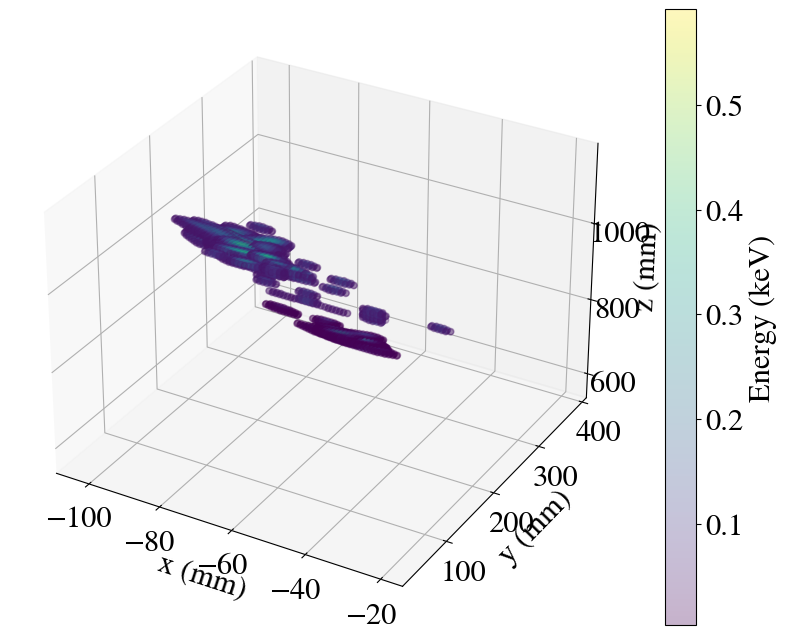

Event 5080010 
Energy: 1.4137


TypeError: suptitle() missing 1 required positional argument: 't'

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x, y, z, c=e, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

plt.show()
hits_df_evt = hdst[hdst.event == evt_number]
print('Event {} \nEnergy: {:.4f}'.format(evt_number, hits_df_evt.E.sum()))

In [41]:
# extract the relevant isaura blob positions
display(hdst_isaura.loc[hdst_isaura['event'] == evt_number])
# take blob x,y,z for 1 and 2 here and plot them with circles

#blob1_x = 

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
22,5080010,0,1.245101,77.117883,103,10104,8,-88.325,56.675,1118.789551,...,1120.857091,-52.379341,61.995799,1160.489484,0.505458,0.074204,0.000000,9.222222,9.942857,4.964774
23,5080010,1,0.142156,10.473699,4,1120,8,-84.325,355.675,578.050293,...,580.458542,-73.057690,361.110007,583.747191,0.142156,0.142156,0.142156,9.222222,9.942857,4.964774
24,5080010,2,0.009802,9.222222,2,28,8,-56.325,116.675,1013.761719,...,1013.761719,-43.569607,117.608126,1013.761719,0.009802,0.009802,0.009802,9.222222,9.942857,4.964774
25,5080010,3,0.008548,9.942857,2,29,8,-25.325,145.675,995.911072,...,995.911072,-23.034644,148.364017,995.911072,0.008548,0.008548,0.008548,9.222222,9.942857,4.964774
26,5080010,4,0.002383,0.000000,1,33,8,-72.325,129.675,1044.220703,...,1044.220703,-69.581988,132.578788,1044.220703,0.002383,0.002383,0.002383,9.222222,9.942857,4.964774
27,5080010,5,0.001948,9.942857,2,30,8,-56.325,114.675,1106.150269,...,1106.150269,-54.022279,117.733583,1106.150269,0.001948,0.001948,0.001948,9.222222,9.942857,4.964774
28,5080010,6,0.001914,9.942857,2,30,8,-56.325,114.675,1034.758057,...,1034.758057,-54.001049,117.716260,1034.758057,0.001914,0.001914,0.001914,9.222222,9.942857,4.964774
29,5080010,7,0.001847,0.000000,1,28,8,-72.325,129.675,1087.253784,...,1087.253784,-69.637430,132.567662,1087.253784,0.001847,0.001847,0.001847,9.222222,9.942857,4.964774


Text(0, 0.5, 'z (mm)')

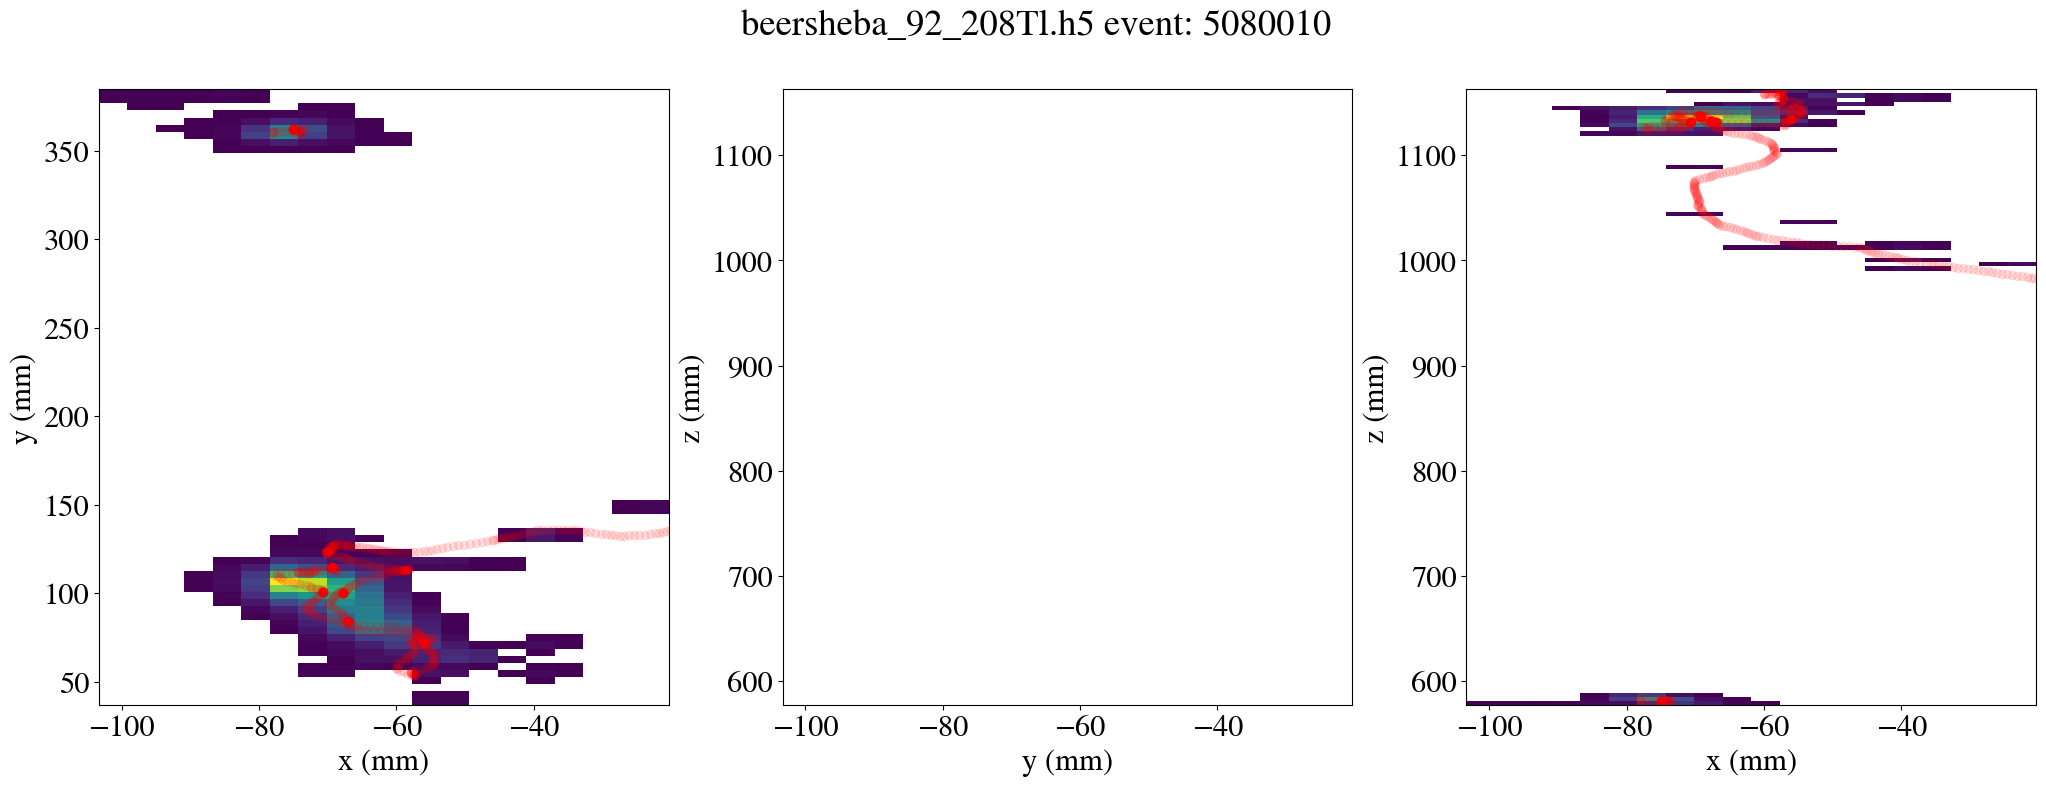

In [42]:
# plot x,y,z
plot_title = "beersheba_92_208Tl.h5 event: " + str(evt_number)
fig, ((ax1), (ax2), (ax3)) = plt.subplots(1, 3, sharex=True, figsize=(25, 8))
fig.suptitle(plot_title)


ax1.hist2d(x, y, weights=e, bins=(int(x_range/2), int(y_range/2)),
               range=((mid_x - x_range, mid_x + x_range), (mid_y - y_range, mid_y + y_range)),
               cmin=0.0001)
# MC
ax1.scatter(xt, yt, color='red', alpha = 0.1)

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')

ax2.hist2d(y, z, weights=e, bins=(int(y_range/2), int(z_range/2)),
               range=((mid_y - y_range, mid_y + y_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)

# MC
ax2.scatter(yt, zt, color='red', alpha = 0.1)

ax2.set_xlabel('y (mm)')
ax2.set_ylabel('z (mm)')

ax3.hist2d(x, z, weights=e,  bins=(int(x_range/2), int(z_range/2)),
               range=((mid_x - x_range, mid_x + x_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)

# MC
ax3.scatter(xt, zt, color='red', alpha = 0.1)

ax3.set_xlabel('x (mm)')
ax3.set_ylabel('z (mm)')

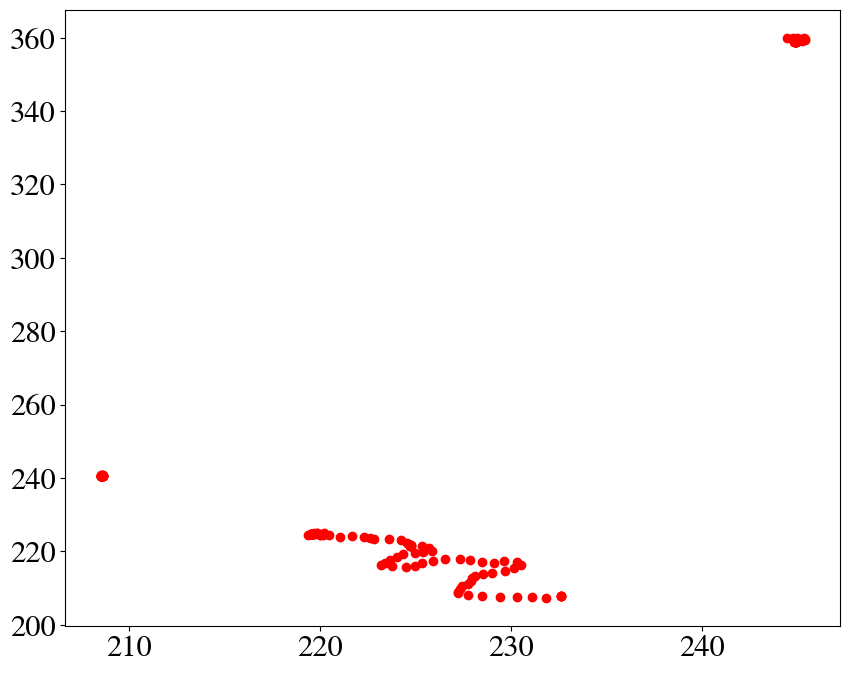

In [28]:
plt.scatter(xt,yt, color='red')